## Image Classification using LeNet, VGGNet and ResNet on Fashion MNIST, CIFAR-10 and EuroSAT Datasets

This notebook trains LeNet, VGGNet, and ResNet models on three datasets from scratch using PyTorch, resulting in a total of 9 trained models. 

The architecture for each network can be found in ```<architecture_name>.py```, and the training and evaluation code can be found in ```cnnbuilder.py```.

In [1]:
import torch
import os

from lenet import LeNet
from vgg import VGGNet
from resnet import ResNet
from cnnbuilder import CNNBuilder

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

If you're retraining the model, set ```skip_training``` to ```True```. Newly trained models will be saved as ```models/new_{dataset}_{architecture}.pth```.

If it's set to ```False```, the previously trained model of the filename ```models/{dataset}_{architecture}.pth``` will be loaded and used. Make sure to rename the model you'd like to keep and remove the ```new_``` prefix, which is appended in newly trained models to prevent overwriting of the selected ones.

In ```run_settings```, list the combinations you'd like to run for training or evaluation. For instance, if you only want to train ```lenet``` on ```fashionmnist```, then remove the other entries in the ```run_settings``` variable.

In [2]:
# configurable parameters, can as needed

# set to true if loading existing model file, false if training
skip_training = True

# run_settings[0]: choose only from 'lenet', 'vggnet' and 'resnet'
# run_settings[1]: choose only from 'fashionmnist, 'cifar10' and 'eurosat'
# full list:
# [('lenet', 'fashionmnist'), ('lenet', 'cifar10'), ('lenet', 'eurosat'),
#  ('vggnet', 'fashionmnist'), ('vggnet', 'cifar10'), ('vggnet', 'eurosat'),
#  ('resnet', 'fashionmnist'), ('resnet', 'cifar10'), ('resnet', 'eurosat')]
# remove settings below if needed
run_settings = [('lenet', 'fashionmnist'),
                ('lenet', 'cifar10'),
                ('lenet', 'eurosat'),
                ('vggnet', 'fashionmnist'),
                ('vggnet', 'cifar10'),
                ('vggnet', 'eurosat'),
                ('resnet', 'fashionmnist'),
                ('resnet', 'cifar10'),
                ('resnet', 'eurosat')]

# set data dir paths
data_dir = 'data/'

This creates the ```models``` and ```logs``` directories. The ```models``` directory is where trained model weights are saved, and the ```logs``` directory is where chart plots, images, historical metrics, and summary metrics are saved.

In [3]:
# create save paths if not existing
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
if not os.path.exists('models'):
    os.makedirs('models')
if not os.path.exists('logs'):
    os.makedirs('logs')
for _, dataset in run_settings:
    if not os.path.exists('logs/' + dataset):
        os.makedirs('logs/' + dataset)

The device_type is automatically set to ```cuda``` if it's available; otherwise, it's set to ```cpu```. You can also overwrite it if you have a different device setup.

In [4]:
# additional settings

# set to as appropriate: on either cpu or gpu
if skip_training:
    device_type = 'cpu'
elif torch.cuda.is_available():
    device_type = 'cuda:0'
else:
    device_type = 'cpu'

This function is used to train or evaluate all 9 models below.

In [5]:
def run_archi_on_dataset(archi_type, dataset, net):
    cnn = CNNBuilder(net, device_type, archi_type=archi_type, dataset=dataset)
    cnn.load_dataset(data_dir)

    # change paths if needed
    if not skip_training:
        metrics = cnn.train(save_path='models/new_{}_{}.pth', epochs=20)
        cnn.plot_metrics(metrics, save_path='logs/{}/new_{}_hist.{}')
    else:
        cnn.load_model(save_path='models/{}_{}.pth')
    loss, accuracy = cnn.compute_metrics(save_predictions=True)
    print('Performance of {0} on {1} test images: loss {2:.2f}, accuracy {3:.2f}'
          .format(archi_type, dataset, loss, accuracy))
    cnn.generate_classification_report(save_path='logs/{}/new_{}_summ.json')
    cnn.plot_images(save_path='logs/{}/new_{}_images.png')

### LeNet on Fashion MNIST dataset

/Users/abby/opt/anaconda3/envs/mlops_projs/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Model loaded from: models/fashionmnist_lenet.pth
Performance of lenet on fashionmnist test images: loss 0.31, accuracy 0.89


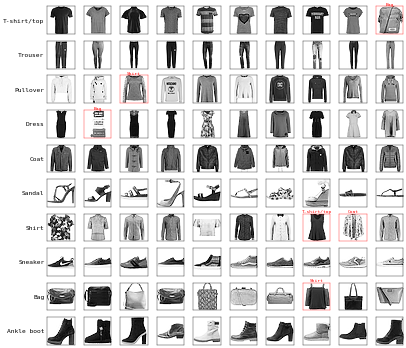

In [6]:
# LeNet FashionMNIST
archi_type, dataset, in_channels = ('lenet', 'fashionmnist', 1)
net = LeNet(in_channels, 10)
if (archi_type, dataset) in run_settings:
    run_archi_on_dataset(archi_type, dataset, net)

### LeNet on CIFAR-10 dataset

/Users/abby/opt/anaconda3/envs/mlops_projs/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Files already downloaded and verified
Files already downloaded and verified
Model loaded from: models/cifar10_lenet.pth
Performance of lenet on cifar10 test images: loss 1.03, accuracy 0.65


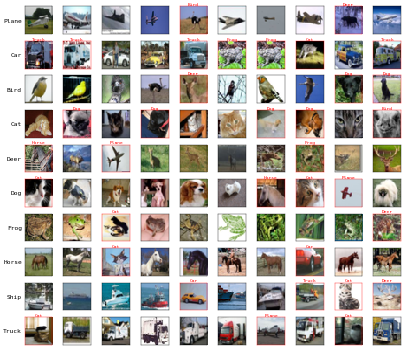

In [7]:
# LeNet CIFAR10
archi_type, dataset, in_channels = ('lenet', 'cifar10', 3)
net = LeNet(in_channels, 10)
if (archi_type, dataset) in run_settings:
    run_archi_on_dataset(archi_type, dataset, net)

### LeNet on EuroSAT dataset

/Users/abby/opt/anaconda3/envs/mlops_projs/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Model loaded from: models/eurosat_lenet.pth
Performance of lenet on eurosat test images: loss 0.39, accuracy 0.86


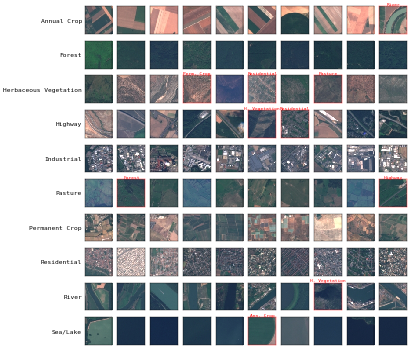

In [8]:
# LeNet EuroSAT
archi_type, dataset, in_channels = ('lenet', 'eurosat', 3)
net = LeNet(in_channels, 10)
if (archi_type, dataset) in run_settings:
    run_archi_on_dataset(archi_type, dataset, net)

### VGGNet on Fashion MNIST dataset

Model loaded from: models/fashionmnist_vggnet.pth
Performance of vggnet on fashionmnist test images: loss 0.25, accuracy 0.93


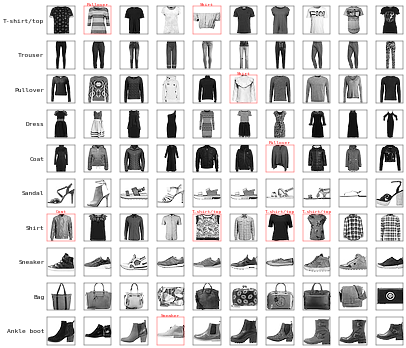

In [9]:
# VGGNet FashionMNIST
archi_type, dataset, in_channels = ('vggnet', 'fashionmnist', 1)
net = VGGNet(in_channels, 10)
if (archi_type, dataset) in run_settings:
    run_archi_on_dataset(archi_type, dataset, net)

### VGGNet on CIFAR-10 dataset

Files already downloaded and verified
Files already downloaded and verified
Model loaded from: models/cifar10_vggnet.pth
Performance of vggnet on cifar10 test images: loss 0.62, accuracy 0.81


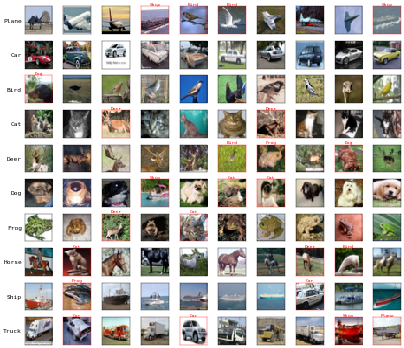

In [10]:
# VGGNet CIFAR10
archi_type, dataset, in_channels = ('vggnet', 'cifar10', 3)
net = VGGNet(in_channels, 10)
if (archi_type, dataset) in run_settings:
    run_archi_on_dataset(archi_type, dataset, net)

### VGGNet on EuroSAT dataset

Model loaded from: models/eurosat_vggnet.pth
Performance of vggnet on eurosat test images: loss 0.13, accuracy 0.96


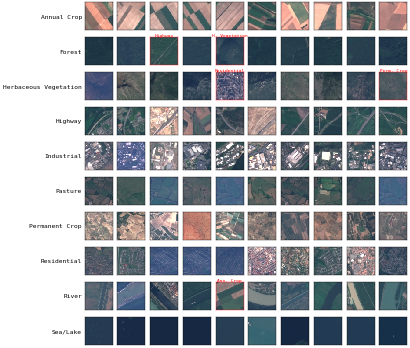

In [11]:
# VGGNet EuroSAT
archi_type, dataset, in_channels = ('vggnet', 'eurosat', 3)
net = VGGNet(in_channels, 10)
if (archi_type, dataset) in run_settings:
    run_archi_on_dataset(archi_type, dataset, net)

### ResNet on Fashion MNIST dataset

Model loaded from: models/fashionmnist_resnet.pth
Performance of resnet on fashionmnist test images: loss 0.38, accuracy 0.92


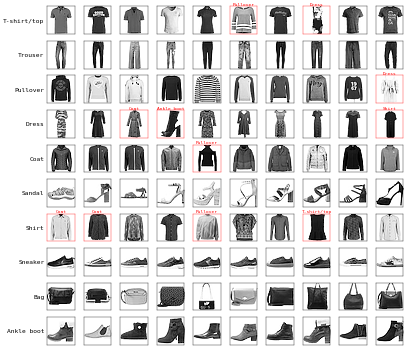

In [12]:
# ResNet FashionMNIST
archi_type, dataset, in_channels = ('resnet', 'fashionmnist', 1)
net = ResNet(in_channels, 10)
if (archi_type, dataset) in run_settings:
    run_archi_on_dataset(archi_type, dataset, net)

### ResNet on CIFAR-10 dataset

Files already downloaded and verified
Files already downloaded and verified
Model loaded from: models/cifar10_resnet.pth
Performance of resnet on cifar10 test images: loss 1.20, accuracy 0.78


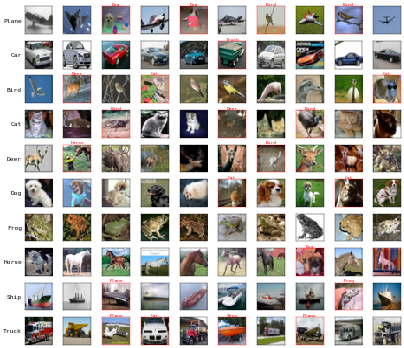

In [13]:
# ResNet CIFAR10
archi_type, dataset, in_channels = ('resnet', 'cifar10', 3)
net = ResNet(in_channels, 10)
if (archi_type, dataset) in run_settings:
    run_archi_on_dataset(archi_type, dataset, net)

### ResNet on EuroSAT dataset

Model loaded from: models/eurosat_resnet.pth
Performance of resnet on eurosat test images: loss 0.07, accuracy 0.98


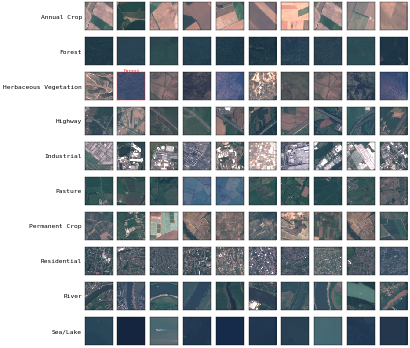

In [14]:
# ResNet EuroSAT
archi_type, dataset, in_channels = ('resnet', 'eurosat', 3)
net = ResNet(in_channels, 10)
if (archi_type, dataset) in run_settings:
    run_archi_on_dataset(archi_type, dataset, net) 

In [15]:
if False:  # set to true if downloading files from google colab
    from google.colab import files
    !zip -r /content/models.zip /content/models
    files.download("/content/models.zip")
    !zip -r /content/logs.zip /content/logs
    files.download("/content/logs.zip")